In [81]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)


In [42]:
df = pd.read_csv(r"D:\Рабочий стол\Мэг_питон\ML\grant_data_imb.csv", sep=',')
df.sample(5)

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,RFCD.Percentage.5,SEO.Code.1,SEO.Percentage.1,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Code.4,SEO.Percentage.4,SEO.Code.5,SEO.Percentage.5,Person.ID.1,Role.1,Year.of.Birth.1,Country.of.Birth.1,Home.Language.1,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
2686,1,4D,10A,D,270106.0,40.0,270105.0,30.0,270103.0,30.0,0.0,0.0,0.0,0.0,730108.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33752.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2578.0,25.0,NaN,>5 to 10,1.0,0.0,1.0,0.0,0.0,0.0
3253,0,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXT_CHIEF_INVESTIGATOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,0,2B,10A,NaN,420114.0,40.0,420399.0,30.0,370302.0,30.0,0.0,0.0,0.0,0.0,750702.0,40.0,751005.0,30.0,740301.0,30.0,0.0,0.0,0.0,0.0,24257.0,CHIEF_INVESTIGATOR,1955.0,Asia Pacific,Other,548.0,7.0,NaN,NaN,0.0,1.0,0.0,1.0,2.0,0.0
253,0,2B,10A,NaN,360201.0,40.0,400399.0,40.0,400303.0,20.0,0.0,0.0,0.0,0.0,751006.0,60.0,750805.0,20.0,750802.0,20.0,0.0,0.0,0.0,0.0,21017.0,CHIEF_INVESTIGATOR,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,4.0,0.0,0.0
960,0,NaN,NaN,NaN,321208.0,45.0,321204.0,30.0,321206.0,25.0,0.0,0.0,0.0,0.0,730211.0,45.0,730217.0,30.0,730306.0,25.0,0.0,0.0,0.0,0.0,131257.0,CHIEF_INVESTIGATOR,1980.0,Australia,NaN,2923.0,25.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
df.columns = df.columns.str.lower().str.replace(".", "_")
df.columns = df.columns.str.replace("a__1", "a_note_1").str.replace("___", 
                                                "_").str.replace("__", "_")
# приводим к виду согласно pep8, для удобства чтения и работы с датафреймом
df.columns

Index(['grant_status', 'sponsor_code', 'grant_category_code',
       'contract_value_band_see_note_a', 'rfcd_code_1', 'rfcd_percentage_1',
       'rfcd_code_2', 'rfcd_percentage_2', 'rfcd_code_3', 'rfcd_percentage_3',
       'rfcd_code_4', 'rfcd_percentage_4', 'rfcd_code_5', 'rfcd_percentage_5',
       'seo_code_1', 'seo_percentage_1', 'seo_code_2', 'seo_percentage_2',
       'seo_code_3', 'seo_percentage_3', 'seo_code_4', 'seo_percentage_4',
       'seo_code_5', 'seo_percentage_5', 'person_id_1', 'role_1',
       'year_of_birth_1', 'country_of_birth_1', 'home_language_1', 'dept_no_1',
       'faculty_no_1', 'with_phd_1', 'no_of_years_in_uni_at_time_of_grant_1',
       'number_of_successful_grant_1', 'number_of_unsuccessful_grant_1',
       'a_note_1', 'a_1', 'b_1', 'c_1'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   grant_status                           4113 non-null   int64  
 1   sponsor_code                           3856 non-null   object 
 2   grant_category_code                    3856 non-null   object 
 3   contract_value_band_see_note_a         1953 non-null   object 
 4   rfcd_code_1                            3853 non-null   float64
 5   rfcd_percentage_1                      3853 non-null   float64
 6   rfcd_code_2                            3853 non-null   float64
 7   rfcd_percentage_2                      3853 non-null   float64
 8   rfcd_code_3                            3853 non-null   float64
 9   rfcd_percentage_3                      3853 non-null   float64
 10  rfcd_code_4                            3853 non-null   float64
 11  rfcd

In [45]:
df.isna().sum()

grant_status                                0
sponsor_code                              257
grant_category_code                       257
contract_value_band_see_note_a           2160
rfcd_code_1                               260
rfcd_percentage_1                         260
rfcd_code_2                               260
rfcd_percentage_2                         260
rfcd_code_3                               260
rfcd_percentage_3                         260
rfcd_code_4                               260
rfcd_percentage_4                         260
rfcd_code_5                               260
rfcd_percentage_5                         260
seo_code_1                                276
seo_percentage_1                          276
seo_code_2                                276
seo_percentage_2                          276
seo_code_3                                276
seo_percentage_3                          276
seo_code_4                                276
seo_percentage_4                  

Датафрейм имеет 4113 строки, 39 колонок, 8 из которых типа object, остальные - float64(30) и int64(1). Объем занимаемой памяти 1.2+ MB.  
Во всех столбцах, кроме grant_status, есть пропуски.

In [46]:
df.select_dtypes(include='object').apply(lambda x: x.unique())

sponsor_code                             [97A, 36D, 317A, 62B, 1A, 4D, 2B, 60D, 21A, 149A, 252D, 65A, 40D, 24D, 34B, 166B, 6B, 29A, 5A, 141A, nan, 32D, 89A, 52D, 18B, 33A, 91C, 12D, 20D, 66B, 145A, 179C, 86B, 42B, 183C, 112D, 234B, 49A, 437A, 77A, 83C, 93A, 229A, 84D, 196D, 281A, 69A, 161A, 51C, 226B, 269A, 188D, 94B, 173A, 221A, 9A, 126B, 133A, 101A, 215C, 172D, 138B, 219C, 59C, 315C, 205A, 247C, 194B, 15C, 3C, 55C, 204D, 90B, 163C, 307C, 206B, 95C, 7C, 180D, 214B, 197A, 349A, 232D, 325A, 266B, 164D, 63C, 228D, 187C, 208D, 241A, 48D, 309A, 73A, 28D, 362B, 39C, 67C, 212D, 200D, ...]
grant_category_code                                                                                                                                                                                                                                                                                                                                                                                                       

In [47]:
# вариант 2
o_column_name = ['sponsor_code', 'grant_category_code',
                 'contract_value_band_see_note_a','role_1','country_of_birth_1', 'home_language_1', 'with_phd_1', 'no_of_years_in_uni_at_time_of_grant_1']
o_values = df.select_dtypes(include='object').apply(lambda x: x.unique())
 
new_dict = {o_column_name: o_values for o_column_name,
            o_values in zip(o_column_name, o_values)}
print(new_dict)

{'sponsor_code': array(['97A', '36D', '317A', '62B', '1A', '4D', '2B', '60D', '21A',
       '149A', '252D', '65A', '40D', '24D', '34B', '166B', '6B', '29A',
       '5A', '141A', nan, '32D', '89A', '52D', '18B', '33A', '91C', '12D',
       '20D', '66B', '145A', '179C', '86B', '42B', '183C', '112D', '234B',
       '49A', '437A', '77A', '83C', '93A', '229A', '84D', '196D', '281A',
       '69A', '161A', '51C', '226B', '269A', '188D', '94B', '173A',
       '221A', '9A', '126B', '133A', '101A', '215C', '172D', '138B',
       '219C', '59C', '315C', '205A', '247C', '194B', '15C', '3C', '55C',
       '204D', '90B', '163C', '307C', '206B', '95C', '7C', '180D', '214B',
       '197A', '349A', '232D', '325A', '266B', '164D', '63C', '228D',
       '187C', '208D', '241A', '48D', '309A', '73A', '28D', '362B', '39C',
       '67C', '212D', '200D', '148D', '154B', '245A', '311C', '105A',
       '47C', '222B', '137A', '159C', '100D', '143C', '193A', '324D',
       '38B', '75C', '427C', '103C', '415C', '13

In [48]:
# просто попробовала, читается удобней
o_column = pd.DataFrame(list(new_dict. items ()), columns = ['column_name',
                                                              'o_values'])
o_column

,column_name,o_values
0,sponsor_code,"[97A, 36D, 317A, 62B, 1A, 4D, 2B, 60D, 21A, 149A, 252D, 65A, 40D, 24D, 34B, 166B, 6B, 29A, 5A, 141A, nan, 32D, 89A, 52D, 18B, 33A, 91C, 12D, 20D, 66B, 145A, 179C, 86B, 42B, 183C, 112D, 234B, 49A, 437A, 77A, 83C, 93A, 229A, 84D, 196D, 281A, 69A, 161A, 51C, 226B, 269A, 188D, 94B, 173A, 221A, 9A, 126B, 133A, 101A, 215C, 172D, 138B, 219C, 59C, 315C, 205A, 247C, 194B, 15C, 3C, 55C, 204D, 90B, 163C, 307C, 206B, 95C, 7C, 180D, 214B, 197A, 349A, 232D, 325A, 266B, 164D, 63C, 228D, 187C, 208D, 241A, 48D, 309A, 73A, 28D, 362B, 39C, 67C, 212D, 200D, ...]"
1,grant_category_code,"[30B, 10A, 30D, 10B, 50A, 20A, 30C, nan, 20C, 30E, 30G, 30A, 40C, 30F]"
2,contract_value_band_see_note_a,"[A , G , nan, B , F , D , C , E , H , I , K , J , M , P , O , Q , L ]"
3,role_1,"[CHIEF_INVESTIGATOR, PRINCIPAL_SUPERVISOR, DELEGATED_RESEARCHER, EXT_CHIEF_INVESTIGATOR, HONVISIT, nan, STUD_CHIEF_INVESTIGATOR, EXTERNAL_ADVISOR]"
4,country_of_birth_1,"[Eastern Europe, Australia, Great Britain, North America, Western Europe, Asia Pacific, nan, New Zealand, Middle East and Africa, South Africa, The Americas]"
5,home_language_1,"[nan, English, Other]"
6,with_phd_1,"[Yes , nan]"
7,no_of_years_in_uni_at_time_of_grant_1,"[>10 to 15, Less than 0, >5 to 10, >=0 to 5, nan, more than 15]"


In [49]:
perf_country_mapping = set(df.dropna(subset='country_of_birth_1').apply(
    lambda f: (f['home_language_1'], f['country_of_birth_1']), axis=1))
perf_country_mapping

{('English', 'Asia Pacific'),
 ('English', 'Australia'),
 ('English', 'Eastern Europe'),
 ('English', 'Great Britain'),
 ('English', 'Middle East and Africa'),
 ('English', 'North America'),
 ('English', 'The Americas'),
 ('English', 'Western Europe'),
 ('Other', 'Asia Pacific'),
 ('Other', 'Australia'),
 ('Other', 'Eastern Europe'),
 ('Other', 'Middle East and Africa'),
 ('Other', 'North America'),
 ('Other', 'The Americas'),
 ('Other', 'Western Europe'),
 (nan, 'Asia Pacific'),
 (nan, 'Australia'),
 (nan, 'Eastern Europe'),
 (nan, 'Great Britain'),
 (nan, 'Middle East and Africa'),
 (nan, 'New Zealand'),
 (nan, 'North America'),
 (nan, 'South Africa'),
 (nan, 'The Americas'),
 (nan, 'Western Europe')}

In [50]:
df.loc[(df["country_of_birth_1"] == 'Great Britain') & df["home_language_1"].
       isna(), "home_language_1"] = "English"
df.loc[(df["country_of_birth_1"] == 'South Africa') & df["home_language_1"].
       isna(), "home_language_1"]= "Other"
df.loc[(df["country_of_birth_1"] == 'New Zealand') & df["home_language_1"].
       isna(), "home_language_1"]= "Other"
#df[df["country_of_birth_1"]== 'New Zealand']

,grant_status,sponsor_code,grant_category_code,contract_value_band_see_note_a,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,rfcd_code_4,rfcd_percentage_4,rfcd_code_5,rfcd_percentage_5,seo_code_1,seo_percentage_1,seo_code_2,seo_percentage_2,seo_code_3,seo_percentage_3,seo_code_4,seo_percentage_4,seo_code_5,seo_percentage_5,person_id_1,role_1,year_of_birth_1,country_of_birth_1,home_language_1,dept_no_1,faculty_no_1,with_phd_1,no_of_years_in_uni_at_time_of_grant_1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a_note_1,a_1,b_1,c_1
36,0,21A,50A,A,330102.0,40.0,330305.0,30.0,440199.0,30.0,0.0,0.0,0.0,0.0,740301.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135032.0,CHIEF_INVESTIGATOR,1970.0,New Zealand,Other,2298.0,46.0,NaN,>=0 to 5,0.0,1.0,3.0,0.0,4.0,0.0
273,0,21A,50A,A,260114.0,60.0,260104.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,770102.0,50.0,770405.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,22292.0,CHIEF_INVESTIGATOR,1970.0,New Zealand,Other,1033.0,1.0,NaN,NaN,0.0,2.0,0.0,7.0,2.0,0.0
343,0,4D,10A,G,320702.0,75.0,270304.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,730104.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28502.0,CHIEF_INVESTIGATOR,1970.0,New Zealand,Other,2603.0,25.0,Yes,>=0 to 5,0.0,1.0,7.0,8.0,5.0,2.0
409,0,29A,10B,B,321401.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,70.0,730213.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,89467.0,PRINCIPAL_SUPERVISOR,1960.0,New Zealand,Other,2678.0,25.0,NaN,NaN,2.0,6.0,11.0,7.0,3.0,1.0
431,0,24D,30B,B,270104.0,80.0,270304.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,730104.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28502.0,CHIEF_INVESTIGATOR,1970.0,New Zealand,Other,2603.0,25.0,Yes,>=0 to 5,0.0,5.0,11.0,9.0,6.0,2.0
619,1,4D,20C,A,270602.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730105.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89467.0,PRINCIPAL_SUPERVISOR,1960.0,New Zealand,Other,2678.0,25.0,NaN,NaN,1.0,0.0,8.0,2.0,2.0,0.0
637,0,2B,10A,NaN,321204.0,50.0,380102.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,730211.0,60.0,780108.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,81702.0,CHIEF_INVESTIGATOR,1955.0,New Zealand,Other,2558.0,25.0,Yes,more than 15,1.0,0.0,2.0,1.0,1.0,1.0
696,0,2B,10A,NaN,270307.0,60.0,270301.0,30.0,270308.0,10.0,0.0,0.0,0.0,0.0,780105.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11427.0,CHIEF_INVESTIGATOR,1960.0,New Zealand,Other,2628.0,25.0,NaN,Less than 0,0.0,2.0,11.0,2.0,10.0,0.0
721,0,2B,10A,NaN,250399.0,50.0,250301.0,30.0,321023.0,20.0,0.0,0.0,0.0,0.0,670402.0,60.0,730118.0,30.0,730203.0,10.0,0.0,0.0,0.0,0.0,72957.0,CHIEF_INVESTIGATOR,1960.0,New Zealand,Other,3048.0,31.0,Yes,more than 15,3.0,2.0,30.0,6.0,15.0,34.0
880,0,18B,20A,NaN,330103.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,749905.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82377.0,CHIEF_INVESTIGATOR,1950.0,New Zealand,Other,2298.0,46.0,Yes,more than 15,0.0,0.0,1.0,0.0,1.0,3.0


In [51]:
df.contract_value_band_see_note_a.fillna('N', inplace = True)
df.with_phd_1.fillna('No', inplace = True)

In [52]:
df.role_1.dropna(inplace=True) 
# в данном столбце 46 пропусков - меньше 10%, спокойно удаляем 

Заменили NaN кат. признаков подходящими по смыслу значениями

In [53]:
for col in df.select_dtypes(include='float64').columns:
    df[col + '_zero'] = df[col].fillna(0, inplace = True)
    df[col].fillna(df[col].median(), inplace = True)
df

,grant_status,sponsor_code,grant_category_code,contract_value_band_see_note_a,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,rfcd_code_4,rfcd_percentage_4,rfcd_code_5,rfcd_percentage_5,seo_code_1,seo_percentage_1,seo_code_2,seo_percentage_2,seo_code_3,seo_percentage_3,seo_code_4,seo_percentage_4,seo_code_5,seo_percentage_5,person_id_1,role_1,year_of_birth_1,country_of_birth_1,home_language_1,dept_no_1,faculty_no_1,with_phd_1,no_of_years_in_uni_at_time_of_grant_1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a_note_1,a_1,b_1,c_1,rfcd_code_1_zero,rfcd_percentage_1_zero,rfcd_code_2_zero,rfcd_percentage_2_zero,rfcd_code_3_zero,rfcd_percentage_3_zero,rfcd_code_4_zero,rfcd_percentage_4_zero,rfcd_code_5_zero,rfcd_percentage_5_zero,seo_code_1_zero,seo_percentage_1_zero,seo_code_2_zero,seo_percentage_2_zero,seo_code_3_zero,seo_percentage_3_zero,seo_code_4_zero,seo_percentage_4_zero,seo_code_5_zero,seo_percentage_5_zero,person_id_1_zero,year_of_birth_1_zero,dept_no_1_zero,faculty_no_1_zero,number_of_successful_grant_1_zero,number_of_unsuccessful_grant_1_zero,a_note_1_zero,a_1_zero,b_1_zero,c_1_zero
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,0.0,0.0,0.0,0.0,730303.0,50.0,730104.0,30.0,671402.0,20.0,0.0,0.0,0.0,0.0,67037.0,CHIEF_INVESTIGATOR,1950.0,Eastern Europe,NaN,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,620108.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12917.0,PRINCIPAL_SUPERVISOR,1955.0,Australia,NaN,1038.0,1.0,No,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,0,317A,30D,N,321013.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730104.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28607.0,CHIEF_INVESTIGATOR,1965.0,Great Britain,English,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,0.0,0.0,0.0,0.0,730211.0,50.0,730302.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,144632.0,CHIEF_INVESTIGATOR,1960.0,Australia,NaN,2848.0,25.0,No,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,0,1A,10A,N,270603.0,60.0,321205.0,30.0,320603.0,10.0,0.0,0.0,0.0,0.0,730114.0,60.0,730204.0,10.0,730215.0,30.0,0.0,0.0,0.0,0.0,1797.0,CHIEF_INVESTIGATOR,1960.0,North America,NaN,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,0,103C,30B,N,321022.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730305.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,747267.0,CHIEF_INVESTIGATOR,1965.0,NaN,NaN,2773.0,25.0,No,>=0 to 5,0.0,1.0,0.0,0.0,0.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4109,0,2B,10A,N,340208.0,50.0,340499.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,720102.0,50.0,720199.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,64232.0,CHIEF_INVESTIGATOR,1950.0,Asia Pacific,NaN,1678.0,13.0,Yes,more than 15,0.0,1.0,1.0,5.0,8.0,0.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,No

Заполнили пропуски количественных признаков нулями(_zero) и медианой(исходные столбцы)

In [54]:
df.fillna('No info', inplace = True) # заполн. остальное

In [56]:
df.isna().sum().sum()

0

Пропусков нет

In [57]:
features = df.drop(['grant_status','person_id_1'], axis=1)
target = df['grant_status']

In [58]:
target.value_counts()

grant_status
0    3259
1     854
Name: count, dtype: int64

Классы  не сбалансированы

In [59]:
# Используем прямое кодирование для преобразования кат. признаков в численные
features = pd.get_dummies(features, drop_first=True)
features.sample(5)

,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,rfcd_code_4,rfcd_percentage_4,rfcd_code_5,rfcd_percentage_5,seo_code_1,seo_percentage_1,seo_code_2,seo_percentage_2,seo_code_3,seo_percentage_3,seo_code_4,seo_percentage_4,seo_code_5,seo_percentage_5,year_of_birth_1,dept_no_1,faculty_no_1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a_note_1,a_1,b_1,c_1,sponsor_code_101A,sponsor_code_103C,sponsor_code_105A,sponsor_code_107C,sponsor_code_111C,sponsor_code_112D,sponsor_code_113A,sponsor_code_11C,sponsor_code_120D,sponsor_code_126B,sponsor_code_128D,sponsor_code_12D,sponsor_code_130B,sponsor_code_132D,sponsor_code_133A,sponsor_code_135C,sponsor_code_136D,sponsor_code_137A,sponsor_code_138B,sponsor_code_139C,sponsor_code_13A,sponsor_code_141A,sponsor_code_143C,sponsor_code_144D,sponsor_code_145A,sponsor_code_146B,sponsor_code_147C,sponsor_code_148D,sponsor_code_149A,sponsor_code_14B,sponsor_code_150B,sponsor_code_151C,sponsor_code_153A,sponsor_code_154B,sponsor_code_156D,sponsor_code_157A,sponsor_code_158B,sponsor_code_159C,sponsor_code_15C,sponsor_code_160D,sponsor_code_161A,sponsor_code_163C,sponsor_code_164D,sponsor_code_165A,sponsor_code_166B,sponsor_code_168D,sponsor_code_169A,sponsor_code_16D,sponsor_code_170B,sponsor_code_172D,sponsor_code_173A,sponsor_code_174B,sponsor_code_176D,sponsor_code_177A,sponsor_code_178B,sponsor_code_179C,sponsor_code_180D,sponsor_code_183C,sponsor_code_184D,sponsor_code_187C,sponsor_code_188D,sponsor_code_18B,sponsor_code_191C,sponsor_code_193A,sponsor_code_194B,sponsor_code_195C,sponsor_code_196D,sponsor_code_197A,sponsor_code_198B,sponsor_code_199C,sponsor_code_1A,sponsor_code_200D,sponsor_code_201A,sponsor_code_202B,sponsor_code_203C,sponsor_code_204D,sponsor_code_205A,sponsor_code_206B,sponsor_code_208D,sponsor_code_20D,sponsor_code_210B,sponsor_code_212D,sponsor_code_214B,sponsor_code_215C,sponsor_code_216D,sponsor_code_219C,sponsor_code_21A,sponsor_code_221A,sponsor_code_222B,sponsor_code_223C,sponsor_code_225A,sponsor_code_226B,sponsor_code_227C,sponsor_code_228D,sponsor_code_229A,sponsor_code_230B,sponsor_code_232D,sponsor_code_234B,sponsor_code_235C,sponsor_code_238B,sponsor_code_23C,sponsor_code_241A,sponsor_code_242B,sponsor_code_244D,sponsor_code_245A,sponsor_code_247C,sponsor_code_24D,sponsor_code_250B,sponsor_code_252D,sponsor_code_255C,sponsor_code_256D,sponsor_code_257A,sponsor_code_258B,sponsor_code_259C,sponsor_code_260D,sponsor_code_262B,sponsor_code_265A,sponsor_code_266B,sponsor_code_267C,sponsor_code_269A,sponsor_code_26B,sponsor_code_270B,sponsor_code_273A,sponsor_code_274B,sponsor_code_277A,sponsor_code_279C,sponsor_code_27C,sponsor_code_281A,sponsor_code_282B,sponsor_code_284D,sponsor_code_285A,sponsor_code_286B,sponsor_code_289A,sponsor_code_28D,sponsor_code_294B,sponsor_code_295C,sponsor_code_298B,sponsor_code_299C,sponsor_code_29A,sponsor_code_2B,sponsor_code_305A,sponsor_code_307C,sponsor_code_308D,sponsor_code_309A,sponsor_code_310B,sponsor_code_311C,sponsor_code_313A,sponsor_code_315C,sponsor_code_317A,sponsor_code_318B,sponsor_code_324D,sponsor_code_325A,sponsor_code_326B,sponsor_code_328D,sponsor_code_32D,sponsor_code_330B,sponsor_code_331C,sponsor_code_33A,sponsor_code_342B,sponsor_code_346B,sponsor_code_347C,sponsor_code_349A,sponsor_code_34B,sponsor_code_357A,sponsor_code_362B,sponsor_code_36D,sponsor_code_370B,sponsor_code_373A,sponsor_code_37A,sponsor_code_38B,sponsor_code_39C,sponsor_code_3C,sponsor_code_40D,sponsor_code_415C,sponsor_code_427C,sponsor_code_429A,sponsor_code_42B,sponsor_code_433A,sponsor_code_434B,sponsor_code_435C,sponsor_code_437A,sponsor_code_47C,sponsor_code_48D,sponsor_code_49A,sponsor_code_4D,sponsor_code_51C,sponsor_code_52D,sponsor_code_53A,sponsor_code_54B,sponsor_code_55C,sponsor_code_56D,sponsor_code_58B,sponsor_code_59C,sponsor_code_5A,sponsor_code_60D,sponsor_code_62B,sponsor_code_63C,sponsor_code_65A,sponsor_code_66B,sponsor_code_67C,sponsor_code_68D,sponsor_code_69A,sponso

In [60]:
# Порядковое кодирование - результат при масштабировании получился тот же
#encoder = OrdinalEncoder()
#encoder.fit(features)
#features_ordinal = encoder.transform(features)
#features_ordinal = pd.DataFrame(encoder.transform(features), columns=features.
#columns)

In [61]:
# Разделим данные на обучающую и тестовую части
features_train, features_test, target_train, target_test =         train_test_split (features, target, random_state=42, test_size=0.3)

In [62]:
# Приводим признаки к единому масштабу
scaler = StandardScaler()
scaler.fit(features_train)
features_train_sc = scaler.transform(features_train)
features_test_sc = scaler.transform(features_test)
pd.DataFrame(features_train_sc,columns=features_train.columns).head()

,rfcd_code_1,rfcd_percentage_1,rfcd_code_2,rfcd_percentage_2,rfcd_code_3,rfcd_percentage_3,rfcd_code_4,rfcd_percentage_4,rfcd_code_5,rfcd_percentage_5,seo_code_1,seo_percentage_1,seo_code_2,seo_percentage_2,seo_code_3,seo_percentage_3,seo_code_4,seo_percentage_4,seo_code_5,seo_percentage_5,year_of_birth_1,dept_no_1,faculty_no_1,number_of_successful_grant_1,number_of_unsuccessful_grant_1,a_note_1,a_1,b_1,c_1,sponsor_code_101A,sponsor_code_103C,sponsor_code_105A,sponsor_code_107C,sponsor_code_111C,sponsor_code_112D,sponsor_code_113A,sponsor_code_11C,sponsor_code_120D,sponsor_code_126B,sponsor_code_128D,sponsor_code_12D,sponsor_code_130B,sponsor_code_132D,sponsor_code_133A,sponsor_code_135C,sponsor_code_136D,sponsor_code_137A,sponsor_code_138B,sponsor_code_139C,sponsor_code_13A,sponsor_code_141A,sponsor_code_143C,sponsor_code_144D,sponsor_code_145A,sponsor_code_146B,sponsor_code_147C,sponsor_code_148D,sponsor_code_149A,sponsor_code_14B,sponsor_code_150B,sponsor_code_151C,sponsor_code_153A,sponsor_code_154B,sponsor_code_156D,sponsor_code_157A,sponsor_code_158B,sponsor_code_159C,sponsor_code_15C,sponsor_code_160D,sponsor_code_161A,sponsor_code_163C,sponsor_code_164D,sponsor_code_165A,sponsor_code_166B,sponsor_code_168D,sponsor_code_169A,sponsor_code_16D,sponsor_code_170B,sponsor_code_172D,sponsor_code_173A,sponsor_code_174B,sponsor_code_176D,sponsor_code_177A,sponsor_code_178B,sponsor_code_179C,sponsor_code_180D,sponsor_code_183C,sponsor_code_184D,sponsor_code_187C,sponsor_code_188D,sponsor_code_18B,sponsor_code_191C,sponsor_code_193A,sponsor_code_194B,sponsor_code_195C,sponsor_code_196D,sponsor_code_197A,sponsor_code_198B,sponsor_code_199C,sponsor_code_1A,sponsor_code_200D,sponsor_code_201A,sponsor_code_202B,sponsor_code_203C,sponsor_code_204D,sponsor_code_205A,sponsor_code_206B,sponsor_code_208D,sponsor_code_20D,sponsor_code_210B,sponsor_code_212D,sponsor_code_214B,sponsor_code_215C,sponsor_code_216D,sponsor_code_219C,sponsor_code_21A,sponsor_code_221A,sponsor_code_222B,sponsor_code_223C,sponsor_code_225A,sponsor_code_226B,sponsor_code_227C,sponsor_code_228D,sponsor_code_229A,sponsor_code_230B,sponsor_code_232D,sponsor_code_234B,sponsor_code_235C,sponsor_code_238B,sponsor_code_23C,sponsor_code_241A,sponsor_code_242B,sponsor_code_244D,sponsor_code_245A,sponsor_code_247C,sponsor_code_24D,sponsor_code_250B,sponsor_code_252D,sponsor_code_255C,sponsor_code_256D,sponsor_code_257A,sponsor_code_258B,sponsor_code_259C,sponsor_code_260D,sponsor_code_262B,sponsor_code_265A,sponsor_code_266B,sponsor_code_267C,sponsor_code_269A,sponsor_code_26B,sponsor_code_270B,sponsor_code_273A,sponsor_code_274B,sponsor_code_277A,sponsor_code_279C,sponsor_code_27C,sponsor_code_281A,sponsor_code_282B,sponsor_code_284D,sponsor_code_285A,sponsor_code_286B,sponsor_code_289A,sponsor_code_28D,sponsor_code_294B,sponsor_code_295C,sponsor_code_298B,sponsor_code_299C,sponsor_code_29A,sponsor_code_2B,sponsor_code_305A,sponsor_code_307C,sponsor_code_308D,sponsor_code_309A,sponsor_code_310B,sponsor_code_311C,sponsor_code_313A,sponsor_code_315C,sponsor_code_317A,sponsor_code_318B,sponsor_code_324D,sponsor_code_325A,sponsor_code_326B,sponsor_code_328D,sponsor_code_32D,sponsor_code_330B,sponsor_code_331C,sponsor_code_33A,sponsor_code_342B,sponsor_code_346B,sponsor_code_347C,sponsor_code_349A,sponsor_code_34B,sponsor_code_357A,sponsor_code_362B,sponsor_code_36D,sponsor_code_370B,sponsor_code_373A,sponsor_code_37A,sponsor_code_38B,sponsor_code_39C,sponsor_code_3C,sponsor_code_40D,sponsor_code_415C,sponsor_code_427C,sponsor_code_429A,sponsor_code_42B,sponsor_code_433A,sponsor_code_434B,sponsor_code_435C,sponsor_code_437A,sponsor_code_47C,sponsor_code_48D,sponsor_code_49A,sponsor_code_4D,sponsor_code_51C,sponsor_code_52D,sponsor_code_53A,sponsor_code_54B,sponsor_code_55C,sponsor_code_56D,sponsor_code_58B,sponsor_code_59C,sponsor_code_5A,sponsor_code_60D,sponsor_code_62B,sponsor_code_63C,sponsor_code_65A,sponsor_code_66B,sponsor_code_67C,sponsor_code_68D,sponsor_code_69A,sponso

3.

Борьба с дисбалансом классов увеличением выборки

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train)  
target_train_upsampled.value_counts()   
-> grant_status  
1    2388  
0    2282  

Приводим признаки к единому масштабу:  
scaler = StandardScaler()  
scaler.fit(features_train)  
features_train_sc = scaler.transform(features_train_upsampled)  
features_test_sc = scaler.transform(features_test)  
pd.DataFrame(features_train_sc,columns=features_train_upsampled.columns).head()  

model = LogisticRegressionCV(random_state=1, solver='liblinear', cv=10)  
model.fit(features_train_sc, target_train_upsampled)  
roc_auc_score(target_test, model.predict_proba(features_test_sc)[:, 1])  
-> 0.8905985527044196

In [63]:
#Кросс-валидация
model = LogisticRegressionCV(solver='liblinear', random_state=42, class_weight='balanced', cv=10) # Взвешивание классов
model.fit(features_train_sc, target_train)
# метрика качества площадь под ROC-кривой — AUC-ROC
roc_auc_score(target_test, model.predict_proba(features_test_sc)[:, 1])

0.8886271401773873

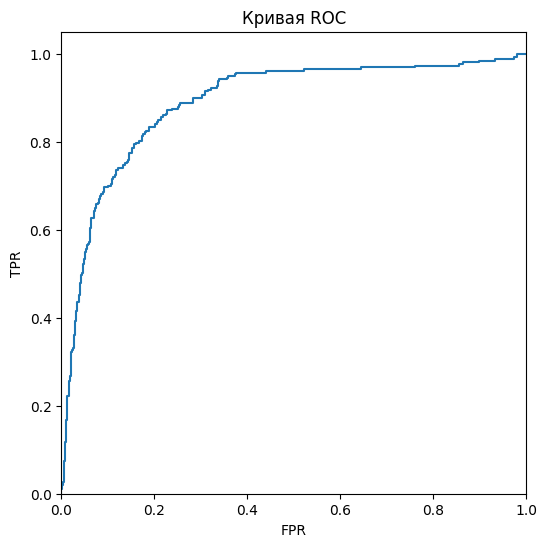

In [64]:
predict_proba_test = model.predict_proba(features_test_sc)
fpr, tpr, thresholds = roc_curve(target_test, predict_proba_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC')
plt.show() 

In [65]:
pd.DataFrame(
    zip(list(features.columns), list(abs(model.coef_[0]))), 
    columns=['feature', 'importance']
).sort_values(by=['importance'], ascending=False).head(10)

,feature,importance
24,number_of_unsuccessful_grant_1,1.592006
280,contract_value_band_see_note_a_N,1.296559
23,number_of_successful_grant_1,1.231469
231,sponsor_code_6B,0.926423
135,sponsor_code_24D,0.807848
224,sponsor_code_62B,0.780919
276,contract_value_band_see_note_a_J,0.547250
259,grant_category_code_30B,0.546851
11,seo_percentage_1,0.525752
10,seo_code_1,0.513179


Модель случайного леса.GridSearchCV

In [70]:
params = { 
    'n_estimators': range(1, 10,3),
    'max_depth':range(1,10, 2),
    'min_samples_leaf':range(1,10),
    'min_samples_split':range(1,10)
    }

In [71]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)
gs.fit(features_train_sc, target_train)
gs.best_params_

c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 12150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 7}

In [73]:
roc_auc_score(target_test, gs.predict_proba(features_test_sc)[:, 1])

0.8853772964964615

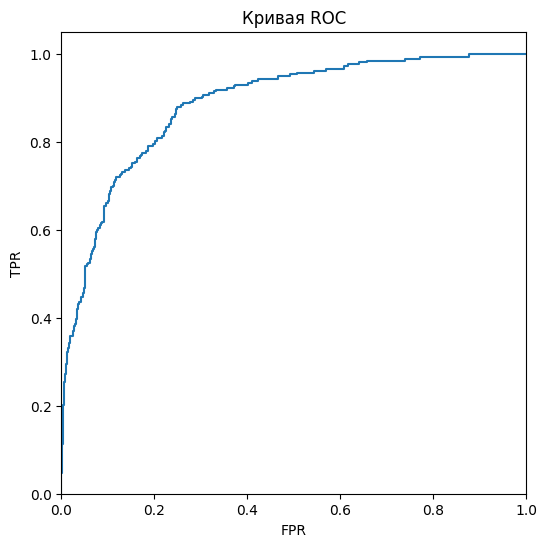

In [72]:
predict_proba_test = gs.predict_proba(features_test_sc)
fpr, tpr, thresholds = roc_curve(target_test, predict_proba_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(fpr, tpr, where='post')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC')
plt.show() 

In [80]:
importances = gs.best_estimator_.feature_importances_
importances = pd.DataFrame({'features': features.columns,
                             'importance':importances})
importances.sort_values(by='importance', ascending=False).head(10)

,features,importance
24,number_of_unsuccessful_grant_1,0.212752
267,grant_category_code_No info,0.097714
23,number_of_successful_grant_1,0.075740
280,contract_value_band_see_note_a_N,0.061074
21,dept_no_1,0.029320
10,seo_code_1,0.027461
0,rfcd_code_1,0.026867
3,rfcd_percentage_2,0.023957
270,contract_value_band_see_note_a_D,0.023578
271,contract_value_band_see_note_a_E,0.021227


Лучшая модель была получена при применении `кросс-валидации` (roc_auc = 0.8886)   
Cогласно обеим моделям наиболее важные признаки: number_of_unsuccessful_grant_1, contract_value_band_see_note_a_N, number_of_successful_grant_1, seo_code_1
